## SENTIMENT ANALYSIS - using WordEmbeddings

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

They are a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

To know more about WordEmbedding and its advantages, click on the following link : [Machine Learning Mastery - Word Embeddings](https://machinelearningmastery.com/what-are-word-embeddings/)

## **Importing necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras  
import tensorflow_datasets as tfds
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Loading and Preprocessing of the data**

I am loading the data that was manually saved onto my drive in the previous notebook - [Twitter airline sentiment analysis - Visualisation](https://colab.research.google.com/drive/18h85gbCA87ZIfnVTD_ax9TAglGKn0slg)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Twitter Airline Reviews Sentiment Dataset/TwitterAirlineReviews.csv', parse_dates=['tweet_created'])

In [0]:
data.head()

,Unnamed: 0,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,clean_text
0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),1,dhepburn said
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),1,plus added commercials experience tacky
2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),1,today must mean need take another trip
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),0,really aggressive blast obnoxious entertainmen...
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),0,really big bad thing


In [0]:
df = data.reset_index().drop(['Unnamed: 0'], axis=1)

Changing the sentiments negative and positive to 0 and 1 respectively and stored in a new column 'sentiment'

In [0]:
df['sentiment'] = df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

Stopwords : Stopwords are those words that do not provide any useful information to decide in which category a text should be classified. This may be either because they don't have any meaning (prepositions, conjunctions, punctuations, etc.) or because they are too frequent in the classification context.

The below function is written to remove all the stopwords and split all the texts into separate words and is stored in the 'meaningful_words' variable.

In [0]:
 stops = list(set(stopwords.words("english")))
 airlines_ats = ['virginamerica','jetblue','deltaassist','americanair','southwestair','united','usairways']
 stops.extend(airlines_ats)
def text_to_words(tweet):
  letters = re.sub("[^a-zA-Z]"," ",tweet)
  word = letters.lower().split()
  meaningful_words = [w for w in word if w not in stops]
  return " ".join(meaningful_words)

The 'text' column is passed to the above function and each row of reviews/texts  is cleaned by removing all the stopwords and separating meaningful words and stored in a new column 'clean_text' of the Data Frame. 

In [0]:
df['clean_text'] = df['text'].apply(lambda x: text_to_words(x))

In [0]:
df['clean_text']

0                                            dhepburn said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637            please bring american airlines blackberry
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: clean_text, Length: 14640, dtype: object

In [0]:
df.head()

,index,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,clean_text
0,0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),1,dhepburn said
1,1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),1,plus added commercials experience tacky
2,2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),1,today must mean need take another trip
3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),0,really aggressive blast obnoxious entertainmen...
4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),0,really big bad thing


In [0]:
review_tokens = [row.split() for row in df['clean_text']]

In [0]:
# A vocabulary of all the clean words in created
vocab = list()
for token in review_tokens:
  vocab.extend(token)

In [0]:
vocab

['dhepburn',
 'said',
 'plus',
 'added',
 'commercials',
 'experience',
 'tacky',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guests',
 'faces',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seats',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hats',
 'parody',
 'https',
 'co',
 'mwpg',
 'grezp',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teens',
 'lt',
 'pretty',
 'graphics',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'nd',
 'trip',
 'australia',
 'amp',
 'even',
 'gone',
 'st',
 'trip',
 'yet',
 'p',
 'virginmedia',
 

In [0]:
vocabulary = list(set(vocab))

In [0]:
# getting the count of unique words in our vocabulary
len_vocab = len(vocabulary)
len_vocab

13507

A WordCloud of all the words collected in 'vocab' after cleaning the texts is displayed. 

In [0]:
wordcloud_text = " ".join(vocab)

In [0]:
from PIL import Image
cloud_mask = np.array(Image.open("/content/white-cloud-png.png"))

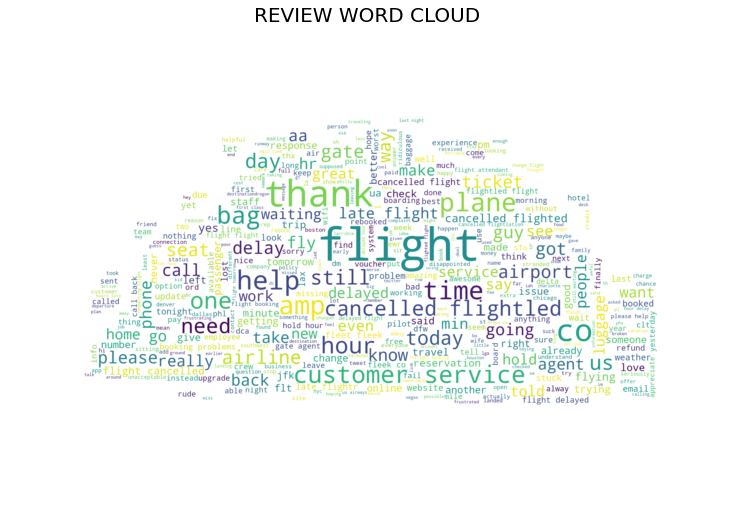

In [0]:
wordcloud =  WordCloud(width=800, height=400, background_color="white", max_words=400, max_font_size=200, mask=cloud_mask,
                       contour_width=2, contour_color = 'white').generate(wordcloud_text)
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.title("REVIEW WORD CLOUD", fontsize=20)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

It seems like 'flight' and 'thank' are the are the most mentioned characteristics.

In [0]:
vectorizer = LabelEncoder()
vectorizer.fit(vocabulary)

LabelEncoder()

In [0]:
token_vector = []

# declare max_words to keep count of the longest sentence vectorized
# we need this to pad every other vector to same length as longest vector

max_tokens = 0
for row in review_tokens:
  encoded = vectorizer.transform(row).tolist()
  size = len(encoded)
  if size > max_tokens:
    max_tokens = size
  token_vector.append(encoded)


max_tokens

22

In [0]:
# Pad every vector in token vector corpus to be as long as longest vector
padded = []

for row in token_vector:
  r = np.pad(row, (0, max_tokens-len(row)), 'constant')
  padded.append(r) 

In [0]:
ex_vector = np.array(padded)
ex_vector

array([[ 2999., 10113.,     0., ...,     0.,     0.,     0.],
       [ 8834.,   140.,  2202., ...,     0.,     0.,     0.],
       [11811.,  7621.,  7194., ...,     0.,     0.,     0.],
       ...,
       [ 8806.,  1423.,   411., ...,     0.,     0.,     0.],
       [ 7490.,  1843.,  4226., ...,     0.,     0.,     0.],
       [ 8934.,  7735.,  6400., ...,     0.,     0.,     0.]])

Splitting of data into train and test sets

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(ex_vector,df['sentiment'], test_size=0.2)

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, ytest))

## **Building the model**

The train and test data is separated into batches with each batch containing 200 data points. 

In [0]:
BATCH_SIZE = 200
SHUFFLE_BUFFER_SIZE = 250

train_data = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_data = test_dataset.batch(BATCH_SIZE)

In [0]:
embedding_dim=30


model = keras.models.Sequential([
  keras.layers.Embedding(len_vocab, embedding_dim),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(15, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 30)          405210    
_________________________________________________________________
global_average_pooling1d (Gl (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 405,691
Trainable params: 405,691
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
# # Train the model and benchmark against Test Data as it's validation data
epochs=5
history = model.fit(train_data, epochs=epochs, validation_data=test_data, verbose=2)

Epoch 1/5
59/59 - 0s - loss: 0.6705 - accuracy: 0.6247 - val_loss: 0.6464 - val_accuracy: 0.6352
Epoch 2/5
59/59 - 0s - loss: 0.6201 - accuracy: 0.6412 - val_loss: 0.5735 - val_accuracy: 0.7230
Epoch 3/5
59/59 - 0s - loss: 0.5136 - accuracy: 0.7802 - val_loss: 0.4689 - val_accuracy: 0.8159
Epoch 4/5
59/59 - 0s - loss: 0.4095 - accuracy: 0.8446 - val_loss: 0.4071 - val_accuracy: 0.8296
Epoch 5/5
59/59 - 0s - loss: 0.3382 - accuracy: 0.8698 - val_loss: 0.3788 - val_accuracy: 0.8395


In [0]:
epoch = model.history.epoch
history = model.history.history

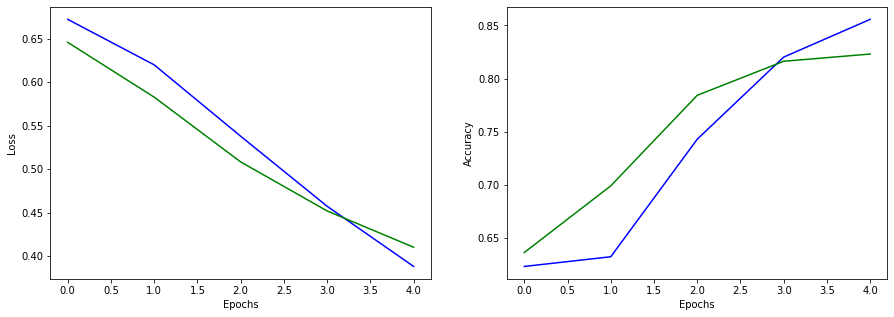

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(epoch, history['loss'], 'b', epoch, history['val_loss'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(epoch, history['accuracy'], 'b', epoch, history['val_accuracy'], 'g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [0]:
pred = model.predict(xtest)
ypred = np.round(pred)
print('Accuracy: ' + str(np.round(accuracy_score(ytest, ypred)*100, 2)) + '%')

Accuracy: 83.47%
